#### This notebook serves to explore titanic data more in depth to discover more relationships between columns and survival rate

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set()

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

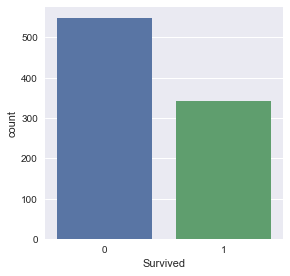

In [3]:
sns.factorplot(x='Survived', data=df_train, kind='count')

##### Now that we know the proportion of those who survived and those who didn't, we can make a baseline accuracy

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
numOfNonSurvivors = df_train[df_train['Survived'] == 0].Survived.count()
totalPassengers = df_train.PassengerId.count()

# baseline accuraccy by perdicting all passengers die
baselineAccuraccy = numOfNonSurvivors/totalPassengers
print(baselineAccuraccy)

0.616161616162


##### this means that the worse we can do by predicting that all passengers die is 61%
##### therefore, anything that we do to improve our model should be better than the baselineAccuraccy
##### we can start by looking and trying to find out certain relationships in the data wrt to survival of the passenger

## Age Vs Survival

##### now we see that, Age has over 100 missing values and we therefore must address this, but let's first take a look at the data and try to visualize it

In [6]:
print(df_train.Age.max())
print(df_train.Age.min())
print(df_train.Age.mean())

80.0
0.42
29.69911764705882


In [7]:
# we will extract the rows where Age is not Nan and look at its distribution 
df_Age_Not_Null = df_train[df_train.Age.isnull() == False]

In [8]:
df_Age_Not_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


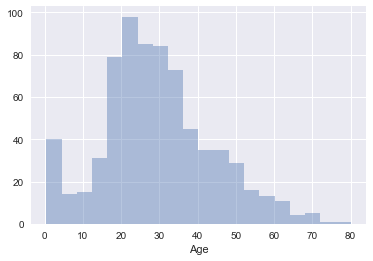

In [9]:
# now we have all the rows where Age is not null and we will look at its distribution
sns.distplot(a=df_Age_Not_Null['Age'], kde=False)

In [10]:
print('Min Age: ' , df_Age_Not_Null.Age.min())
print('Max Age: ' , df_Age_Not_Null.Age.max())
print('Median Age: ', df_Age_Not_Null.Age.median())
print('Mode Age: ',df_Age_Not_Null.Age.mode().loc[0])
print('=============')
df_Age_Not_Null[df_Age_Not_Null['Age'] == 24].info()

Min Age:  0.42
Max Age:  80.0
Median Age:  28.0
Mode Age:  24.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 89 to 864
Data columns (total 12 columns):
PassengerId    30 non-null int64
Survived       30 non-null int64
Pclass         30 non-null int64
Name           30 non-null object
Sex            30 non-null object
Age            30 non-null float64
SibSp          30 non-null int64
Parch          30 non-null int64
Ticket         30 non-null object
Fare           30 non-null float64
Cabin          9 non-null object
Embarked       30 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ KB


#####  from the Age distribution, we can see that there are a lot of passengers in the 20 to 40 year-old range with 24 being the highest occuring age (30 people are aged 24)

##### now let's see the survival rate of the people wrt to Age (we will visualize this using striplot!!)

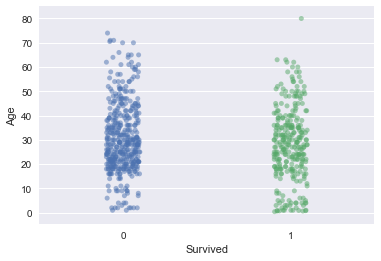

In [11]:
sns.stripplot(data=df_Age_Not_Null, x='Survived', y='Age', jitter=True, alpha=0.5)

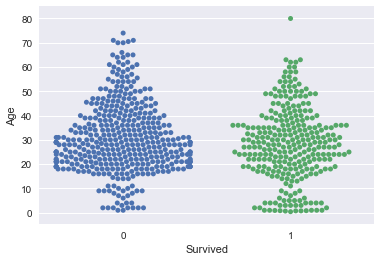

In [12]:
sns.swarmplot(x='Survived', y='Age', data=df_Age_Not_Null)

<p>From both the plots above, we can see that the survival rate for those in between their 20s and 40s are much higher than those in other age groups although death rate is also highest in this age group simply because this age group is the largest in the passenger population</p>

## Conclusion: survival rate for those in between their 20s and 40s are much higher than those in other age groups

# Sex vs Survival

<p>Now, we would also like to see if Sex has anything to do with Survival rate and if it does, is it also correlated with Age?</p>

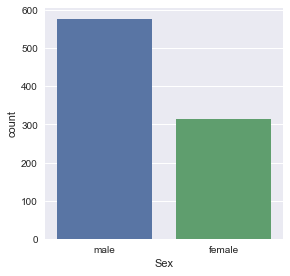

In [13]:
# first of all, let's view the male and female population in the passengers
sns.factorplot(x='Sex', data=df_train, kind='count')

<p>So there's a lot more male than females in the passenger population (note that we are using df_train)</p>
<p>Now, lets view the survival rate</p>

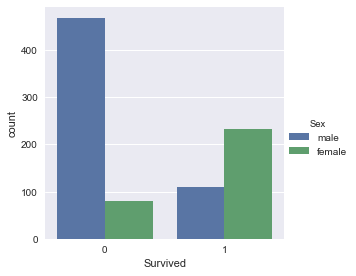

In [14]:
sns.factorplot(x='Survived', data=df_train, hue='Sex', kind='count')

<p>Looks like a lot more females survived compared to males. Maybe the males all ensured that their loved ones survive? Hard to say</p>
<p>Let's see if Age in the females also affected their survival rate</p>

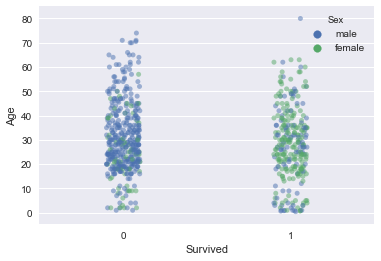

In [15]:
# we will be using df_Age_Not_Null since we also want to see relationship between Age, Sex and Survival
sns.stripplot(x='Survived', y='Age', hue='Sex', data=df_Age_Not_Null, jitter=True, alpha=0.5)

<p>From the plot above, we can see that most of the girls who survived are in the age between 20 and 40</p>

## conclusion: Females have a higher rate of Survival (highest survival rate for those in 20-40 )

## So we can say that Age, Sex are definitely related to Survival and we would have to account for this relationship when we try to account for the missing Age values later

<p>Enough about Age and Sex, let's also identify other possible relationships in the data df_train</p>

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Port of Embarkation Vs Survival
<p>Let's check out if port of embarkation (Embarked) is related to Survival rate</p>
##### Let's first view the distribution of Embarked in our data

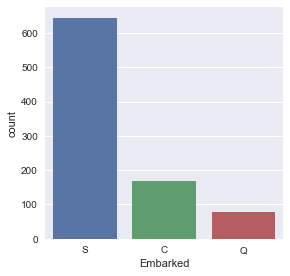

In [18]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.factorplot(x='Embarked', data=df_train, kind='count')

##### Seems like most people embarked form Southampton. However, by the look of it, there are 2 missing values for Embarked, before imputing these values, lets view the exact rows with this missing value

In [19]:
df_train[df_train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


looks like both passengers have the same ticket number and fare as well, they even share the same cabin!! Both even Survived!!

we can try to find passengers with similar profiles and see what their embarkation port is and then determine if we should just fill the embarked using the mode value because it seems very tempting to do so just because most passengers embarked from there

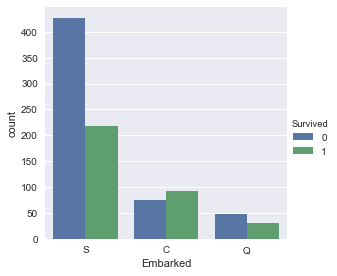

In [20]:
sns.factorplot(x='Embarked', hue='Survived',data=df_train, kind='count')

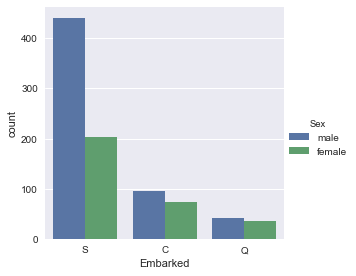

In [21]:
sns.factorplot(x='Embarked', hue='Sex',data=df_train, kind='count')

from both plots above, we can see that the survival rate is higher for those who embarked from C (cherbourg) and Q (queenstown) compared to S(southampton) although most survivors still come from Southampton by sheer number of passengers who boarded there

We can also see that proportion of women from embarking from C and Q is much higher than S although we can't deny that most women still embarked from S 

## Conclusion : survival rate is higher for those who embarked from C (cherbourg) and Q (queenstown) compared to S(southampton)

We can also try to see if fares have anything to do with port of embarkation 

Min Fare:  0.0
Max Fare:  512.3292
Mean Fare:  32.2042079685746


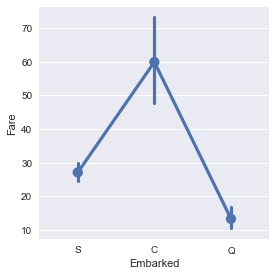

In [22]:
print('Min Fare: ',df_train.Fare.min())
print('Max Fare: ',df_train.Fare.max())
print('Mean Fare: ',df_train.Fare.mean())
sns.factorplot(x='Embarked', y='Fare', data=df_train, kind='point')

In [23]:
print(df_train[df_train['Embarked'] == 'S'].Fare.mean())
print(df_train[df_train['Embarked'] == 'C'].Fare.mean())
print(df_train[df_train['Embarked'] == 'Q'].Fare.mean())

27.07981180124218
59.95414404761905
13.276029870129872


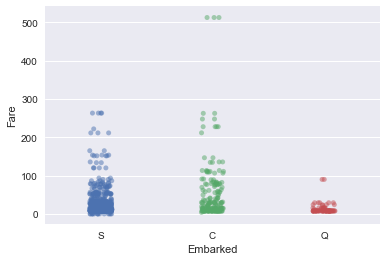

In [24]:
sns.stripplot(data=df_train, x='Embarked', y='Fare', jitter=True, alpha=0.5)

we can also combine a box plot and plot a swarmplot on top of it to view the distribution of fares for all 3 port of embarkation just by plotting both plots on the same grid (by putting them in the same cell) 

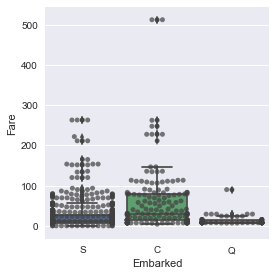

In [25]:
sns.factorplot(x='Embarked', y='Fare', data=df_train, kind='box')
sns.swarmplot(data=df_train, x='Embarked', y='Fare', alpha=0.7, color='0.25')

based on the plot above, we can conclude that on average, those who embarked from port C paid higher fares (surprisingly, those who embarked from this port also had a higher proportion of passengers who survived)

### we can also impute the Embarkation port of the 2 passengers with C and justify that this is because both passengers have survived and they paid higher fares which is closer to the average fare of C

## Conclusion: those who embarked from port C paid higher fares (surprisingly, those who embarked from this port also had a higher proportion of passengers who survived)

now, before we finally impute the missing values for Embarked for both passengers, let's try and also look at relationship between age and port of embarkation 

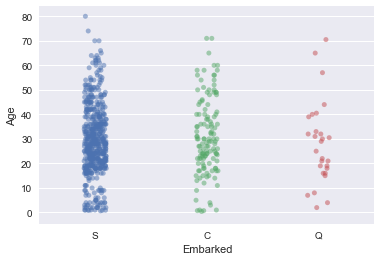

In [26]:
sns.stripplot(data=df_train, x='Embarked', y='Age', jitter=True, alpha=0.5)

not surprisingly, highest age group for ports S and C are within the 20-40 Age group (the same can actually be said for Q but the age distribution is a little sparse (spread out) for this port)

## Conclusion: All Ports seems to have similar age distributions and as such, we may conclude that there may not be much of a correlation between Age and port of Embarkation 

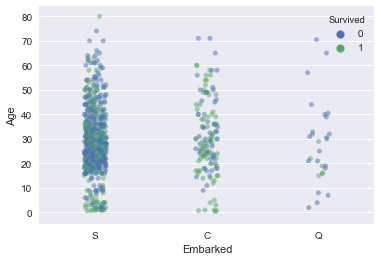

In [27]:
sns.stripplot(data=df_train, x='Embarked', y='Age', hue='Survived',jitter=True, alpha=0.5)

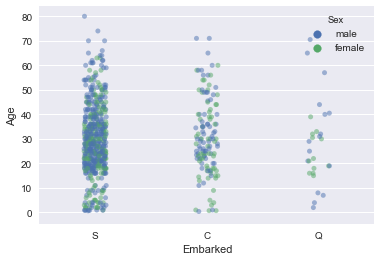

In [28]:
sns.stripplot(data=df_train, x='Embarked', y='Age', hue='Sex',jitter=True, alpha=0.5)

even if we included factors such as survival and sex, we can still see that there's not much of a difference in age and sex distribution for all ports and hence, we can safely say that there's not much of a correlation between age and sex with port of embarkation


## Conclusion: Not much of a correlation between age and sex with port of embarkation

now let's see if there's a correlation between Age, Fare and Survival Rate !! 

Note that we now know that people who embarked from C paid higher fares on average but i we take a closer look at the stripplot above which shows fares paid versus por of embarkation, there's only 2 people in C which paid really really high fares. This could be an outlier as to why average fare paid in C is higher. Regardless, we do not want to overcomplicate the analysis for now and we will leave it at that. 

Now, we shall just focus on Fare and Survival Rate

# Fare vs Survival

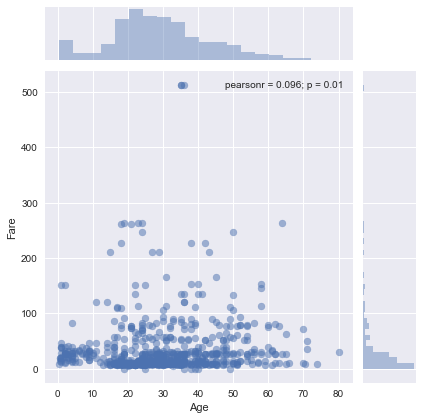

In [29]:
sns.jointplot(x='Age', y='Fare', data=df_train, alpha=0.5)

it seems that from the plot above, most people paid less than $100 in fares. Let's confirm this with a distribution plot

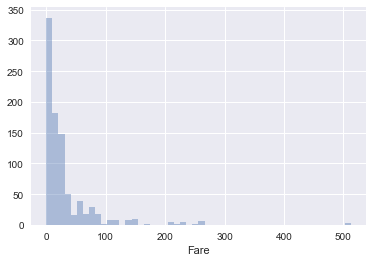

In [30]:
sns.distplot(a=df_train['Fare'], kde=False)

so now we see that most people paid less than $100 in fares. How does this affect survival ? Is there a relationship?

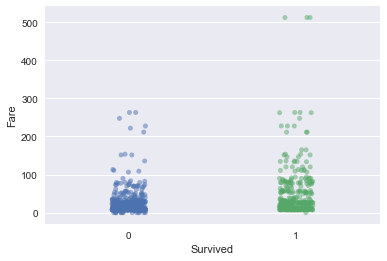

In [31]:
sns.stripplot(data=df_train,x='Survived', y='Fare', jitter=True, alpha=0.5)

from the stripplot above, we can see that those who survived paid higher fares on average vs those who didn't

we can also view this from distribution plot by plotting distribution plot of those who survived above the distribution plot of the entire passenger population

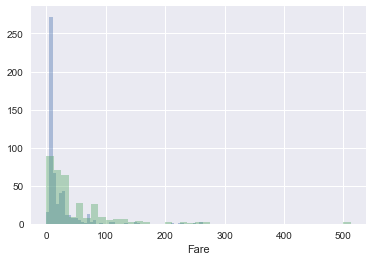

In [32]:
# this uses seaborn (plot the fare distribution for those who did not survive first)
sns.distplot(a=df_train[df_train['Survived'] == 0].Fare, kde=False)
# get the fares for only those who survived (plot them on top of those who did not survive)
sns.distplot(a=df_train[df_train['Survived'] == 1].Fare, kde=False)

# Higher green bars indicate that those who survived paid higher fares on average

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

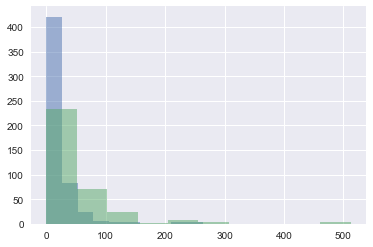

In [33]:
# this uses pandas' hist() method from Series object
df_train.groupby(df_train['Survived']).Fare.hist(alpha=0.5)

we can also view the Fare statistics between those who survived and those who didn't

In [34]:
df_train.groupby(df_train['Survived']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


we can see that those who survived has an average fare more than twice as much as those who didn't. Therefore, there's certainly a correlation between Fare and Survival rate

## Conclusion: Those who paid higher fare have bigger chances of survival

# Pclass vs Survival

let's see if there is any relationship between passenger class (Pclass) and Survival

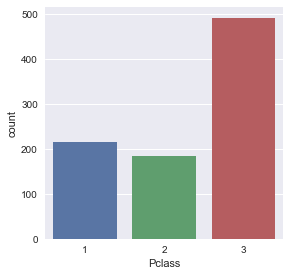

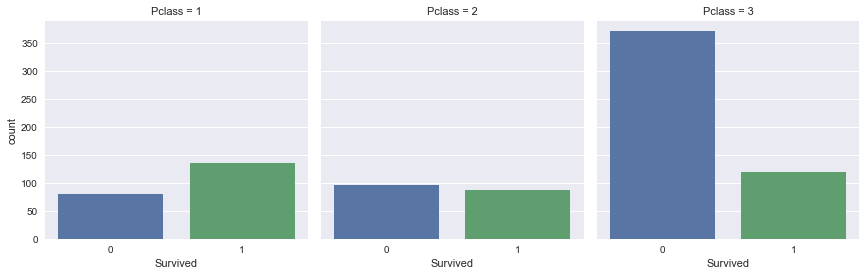

In [35]:
sns.factorplot(data=df_train ,x='Pclass', kind='count')
sns.factorplot(data=df_train, x='Survived', col='Pclass', kind='count')

we see that most passengers are in pclass 3 but those in pclass 1 has higher survival rate and there are even more survivors that come from pclass 1 than 3. So there's certainly a correlation between pclass and survival rate

## Conclusion: Passengers in pclass 1 are more likely to survive than those in other classes (about 50-50 for pclass 2)

# Relationship between Fare and Pclass with Survival rate

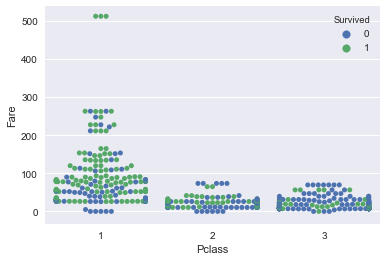

In [36]:
sns.swarmplot(data=df_train, x='Pclass', y='Fare', hue='Survived')

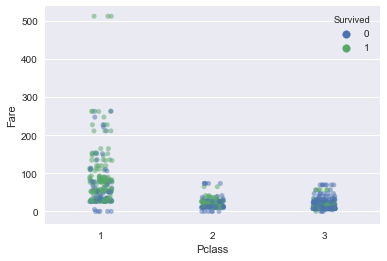

In [37]:
sns.stripplot(data=df_train, x='Pclass', y='Fare', hue='Survived', jitter=True, alpha=0.5)

In [38]:
df_train.groupby(['Pclass']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


## Conclusion: Those in Pclass 1 paid higher fares on average and people who paid higher fares have higher survival rate

# SibSp vs Survival

now, there's another column called sibsp and this is called sibling spouse and it represents the number of siblings and/or spouses that a passenger has on board with them

we would like to ascertain any relationship this has with survival rate of a passenger

let's first view the distribution

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

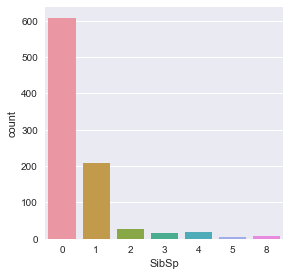

In [41]:
sns.factorplot(data=df_train, x='SibSp', kind='count')

seems like most people are alone. Let's view the distribution vs Survival


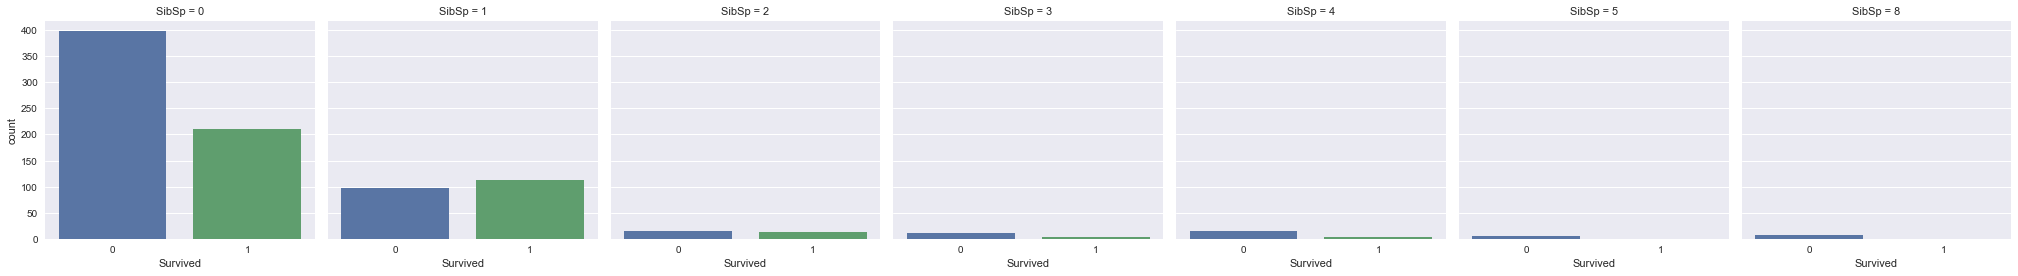

In [42]:
sns.factorplot(data=df_train, x='Survived', col='SibSp', kind='count')

seems like most survivors have at most 1 SibSp (perhaps it helps that they did not need to worry or save other family members other than themselves) 

Surprisingly, those with SibSp 1 have a higher survival rate (50-50 for SibSp 2) and this dramatically reduces with increase in SibSp

SibSp definitely affect a passenger's survival rate 

## Conclusion: Passengers with lower SibSp has higher survival rate

# Parch vs Survival 

let's do that same analysis for Parch since they essentially represent Parents and children on board with passengers (m=family members on board)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


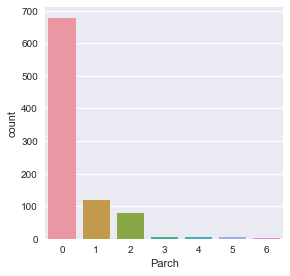

In [43]:
print(df_train.info())
print('=================')
print(df_train.Parch.describe())
sns.factorplot(data=df_train, x='Parch', kind='count')

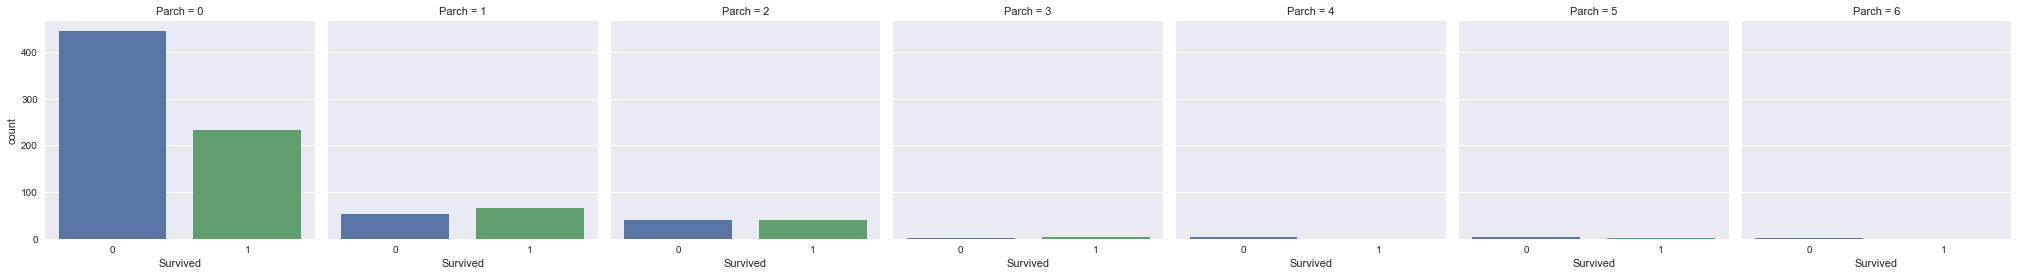

In [44]:
sns.factorplot(data=df_train, x='Survived', col='Parch', kind='count')

seems like most survivors have at most 1 Parch (perhaps it helps that they did not need to worry or save other family members other than themselves)

Surprisingly, those with Parch 1 have a higher survival rate (50-50 for Parch 2) and this dramatically reduces with increase in Parch

SibSp definitely affect a passenger's survival rate

## Conclusion: Passengers with lower Parch has higher survival rate¶

# Cabin vs Survival

Last but not least, we are going to analyse the relationship between cabin and survival rate 

now, we have left this till the end because there are just so many missing values for cabin (or maybe there's only 204 cabins on board and that the rest of the passengers do not have a cabin at all)

In [45]:
print(df_train.Cabin.describe())

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object


In [46]:
# let's find out how many with cabin survived
df_train_w_cabin = df_train[df_train.Cabin.isnull() ==  False]

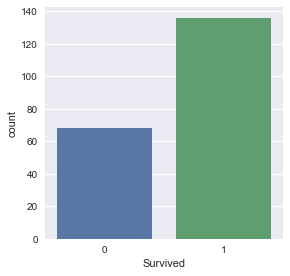

In [47]:
sns.factorplot(data=df_train_w_cabin, x='Survived', kind='count')

from the plot above, we see that there's a higher proportion of those with cabins survived

In [48]:
df_train_w_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


from the table above, we see that there are a few passengers with more than 1 cabin 

In [49]:
df_train_w_cabin.Cabin.str.split(' ', n=0)

1                [C85]
3               [C123]
6                [E46]
10                [G6]
11              [C103]
21               [D56]
23                [A6]
27     [C23, C25, C27]
31               [B78]
52               [D33]
54               [B30]
55               [C52]
61               [B28]
62               [C83]
66               [F33]
75            [F, G73]
88     [C23, C25, C27]
92               [E31]
96                [A5]
97          [D10, D12]
102              [D26]
110             [C110]
118         [B58, B60]
123             [E101]
124              [D26]
128           [F, E69]
136              [D47]
137             [C123]
139              [B86]
148               [F2]
            ...       
751             [E121]
759              [B77]
763         [B96, B98]
765              [D11]
772              [E77]
776              [F38]
779               [B3]
781              [B20]
782               [D6]
789         [B82, B84]
796              [D17]
802         [B96, B98]
806        

now that we manage to split the cabins into arrays, we can get the number of cabins and add them to the table for us to see if there's any relationship between number of cabins and survival rate

after splitting the cabins into individual arrays, we can then count the length of each array to determine how many cabins does each passenger has

In [50]:
print(type(df_train_w_cabin.Cabin.str.split(' ', n=0).apply(lambda x: len(x))))
numOfCabins = df_train_w_cabin.Cabin.str.split(' ', n=0).apply(lambda x: len(x))

<class 'pandas.core.series.Series'>


In [51]:
df_train_w_cabin.loc[:,'NumOfCabins'] = numOfCabins

/Library/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
df_train_w_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumOfCabins
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,3
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1


now that we have added the NumOfCabins column to the dataframe, we can now analyse the relationship between this column and survival rate

In [53]:
df_train_w_cabin.NumOfCabins.describe()

count    204.000000
mean       1.166667
std        0.507740
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: NumOfCabins, dtype: float64

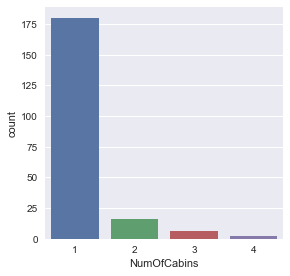

In [54]:
sns.factorplot(data=df_train_w_cabin, x='NumOfCabins', kind='count')

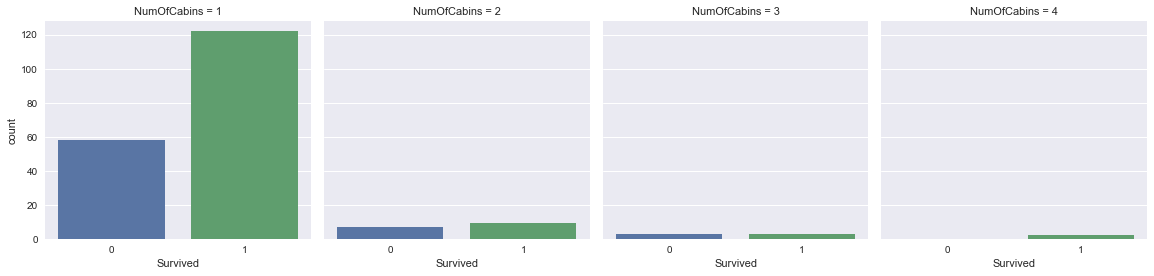

In [55]:
sns.factorplot(data=df_train_w_cabin, x='Survived', col='NumOfCabins', kind='count')

wow, it looks like people with cabins actually had higher survival rates. As can be seen in every column, more people survived than perished

now, let us compare between those who have cabins and those who do not

##### Note: For the purposes of comparison, we will assume that all passengers without cabins do not have a cabin. Therefore, they will have 0 as the number of cabins and the rest wilth cabins will be filled the their respective number of cabins

In [56]:
# create new column NumOfCabins for df_train and first fill those with cabins first 
# and then impute null values with 0 later
df_train['NumOfCabins'] = df_train_w_cabin.NumOfCabins

In [57]:
df_train.NumOfCabins.fillna(value=0, inplace=True)

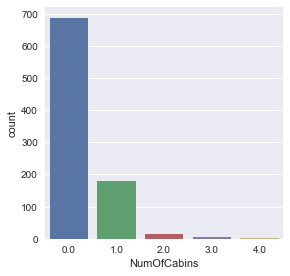

In [58]:
sns.factorplot(data=df_train, x='NumOfCabins', kind='count')

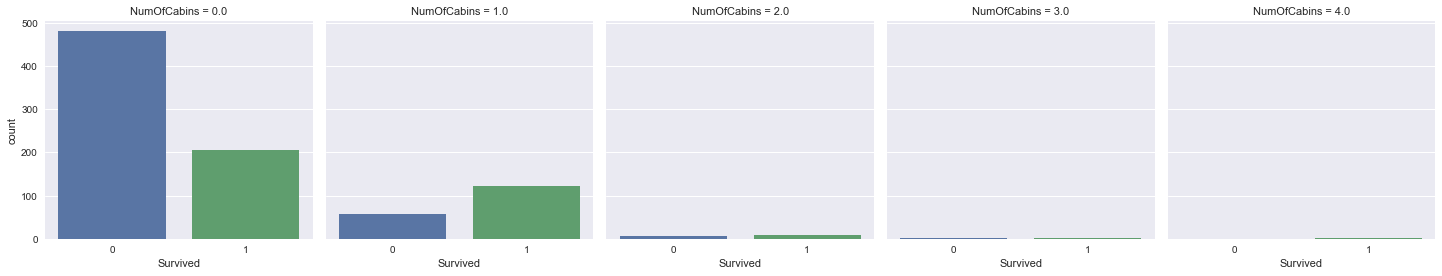

In [59]:
sns.factorplot(data=df_train, col='NumOfCabins' ,x='Survived', kind='count')

based on the plot above, it seems that those with cabins certainly has a higher rate of survival. We will certainly need to take this into account when we train our ML model.

### Conclusion: Passengers with cabin(s) have a higher rate of survival

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumOfCabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


# DATA PREPROCESSING FOR TITANIC DATASET

Now that we have done some EDA, we will now try to do some data preprocessing in order to allow us better train our ML algo with the data.

We will base our findings on EDA Titanic Boon to impute any missing data 

We will perform imputations on both training and test data set

In [61]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Now, we will extract the survived labels from train data and save them. 

In order to ensure our data preprocessing applies to both training and test data set, we will concatenate both training and test data set

In order to preserve the originality of training and test data set we will make copies of both data sets and do preprocessing on the copies instead

In [64]:
#  make copies of both training and test object for us to work on
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [65]:
# make copy of Survived column of training set
train_survived = df_train.Survived

In [66]:
df_train_copy.drop(['Survived'], axis=1, inplace=True)

now that we removed the Survived column for training set, we can concatenate this with test set for preprocessing

In [67]:
df_trainTest_concat = pd.concat([df_train_copy, df_test_copy])

In [68]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


now we see 1309 rows which means we have successfully concatenated both training (819 rows) and test (418 rows) set

##### we see that there are missing data in Age , Fare, Cabin and Embarked. We will need to inspect these rows again and impute the values accordingly

## Age

In [69]:
# check how many missing Age values
df_trainTest_concat.Age.isnull().sum()

263

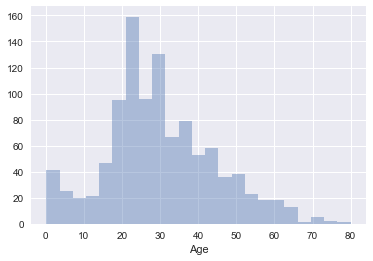

In [70]:
# since we cannot plot rows where Age values are missing,
# we need to extract the rows where Age is not null and plot a distribution plot
df_trainTest_concat_Age_not_null = df_trainTest_concat[df_trainTest_concat['Age'].isnull() == False]

sns.distplot(a=df_trainTest_concat_Age_not_null.Age, kde=False)


In [71]:
print(df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null.Age == 24].info())
print('=============')
print(df_trainTest_concat_Age_not_null.Age.describe())
print('')
print('mode : ', df_trainTest_concat_Age_not_null.Age.mode())
print('median : ', df_trainTest_concat_Age_not_null.Age.median())
# print(' # of median : ', df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null['Age'] == 28].Age.sum())
print(df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null.Age == 28].Age.count())
print('mean : ', df_trainTest_concat_Age_not_null.Age.mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 89 to 396
Data columns (total 11 columns):
PassengerId    47 non-null int64
Pclass         47 non-null int64
Name           47 non-null object
Sex            47 non-null object
Age            47 non-null float64
SibSp          47 non-null int64
Parch          47 non-null int64
Ticket         47 non-null object
Fare           47 non-null float64
Cabin          11 non-null object
Embarked       47 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ KB
None
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

mode :  0    24.0
dtype: float64
median :  28.0
32
mean :  29.881137667304014


now, by viewing the age distribution and other parameters such as median and mean, we see that mean is around 29 years old

we would like to ensure that when we impute the missing age values, we do not change our age distribution by too much

we also want to make sure that the mean is also not changed drastically when we impute the missing values

Therefore, for this purpose, we will simply impute the missing values with the median since this is closer to the mean and to simplify our data preprocessing exercise

In [72]:
# impute all missing values with median value
df_trainTest_concat.Age.fillna(value=28, inplace=True)

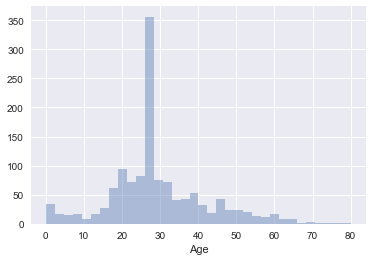

In [73]:
# check our Age distribution again
sns.distplot(a=df_trainTest_concat.Age, kde=False)

In [74]:
df_trainTest_concat.Age.mean()

29.50318563789152

we see that the mean did not change by much after imputation. 

However, we can see that the distribution has not shifted much anywhere although we see a very tall graph which represent all those who were imputed with age 28 (28 is now the mode with the number of missing value rows plus those who were actually 28)

Although some might argue that the data has changed the distribution. This is still acceptable seeing that the mean of the distribution did not change by much.

# FARE

In [75]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [76]:
print(df_trainTest_concat.Fare.isnull().sum())
print(df_train.Fare.isnull().sum())

1
0


we see that there is one missing value for Fare and this did not come from training set. So this must be from the test set!!

since there is onely 1 missing value. let's check out the missing value 

In [77]:
df_trainTest_concat[df_trainTest_concat.Fare.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Look like this passenger is in pclass 3. 

we can look at the fare distribution for Pclass 3 and impute the missing value with its average 

In [78]:
df_trainTest_concat.groupby(['Pclass']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


now we see that those who are in Pclass 3 paid lower fares on average. 
let's view the distribution

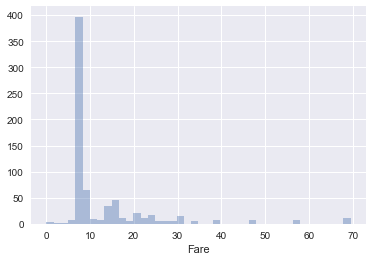

In [79]:
# we want rows where Pclass = 3 and is not null !!
df_pclass3 = df_trainTest_concat.loc[(df_trainTest_concat.Pclass == 3) & (df_trainTest_concat.Fare.isnull() == False)]
sns.distplot(a=df_pclass3.Fare, kde=False)

now we impute the missing fare value with the average of those in Pclass 3 as opposed to just the average of all fares

the average is 13.302889 but we will limit the fare to 2 decimal places since it is unlikely that a passenger will pay anything beyond 2 decimal places

In [80]:
pclass3_ave_fare = round(df_pclass3.Fare.mean(), 2)
df_trainTest_concat.Fare.fillna(value=pclass3_ave_fare, inplace=True)

In [81]:
# passenger with missing fare now has fare = 13.3 
df_trainTest_concat[df_trainTest_concat.PassengerId == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.3,NaN,S


# Cabin

In [82]:
df_trainTest_concat.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

now we see that there are 1014 rows with missing Cabin values. 

Now as per the data analysis in EDA Titanic Boon, we see that there are only 204 passengers with cabin values.

This might be an indication that the majority of the passengers do not have a cabin. Therefore, we do not need to impute any of the missing cabin values. 

However, based on the EDA, we have concluded that passengers with cabins have higher survival rates. Therefore, we would have to create new columns to reflect the number of cabins that a passenger has  

In [83]:
# extract the rows with cabins for calculations
df_rows_with_cabins = df_trainTest_concat[df_trainTest_concat.Cabin.isnull() == False][['PassengerId', 'Cabin']]
df_rows_with_cabins.head()

,PassengerId,Cabin
1,2,C85
3,4,C123
6,7,E46
10,11,G6
11,12,C103


In [84]:
df_rows_with_cabins['Cabin'] = df_rows_with_cabins.Cabin.str.split(' ', n=0).apply(lambda x: len(x))

now that we have imputed the cabin column with number of cabins, we can now join it with the original dataset on the common PassengerId

In [85]:
df_trainTest_concat = df_trainTest_concat.merge(df_rows_with_cabins, left_on=['PassengerId'], right_on=['PassengerId'], how='outer')

In [86]:
df_trainTest_concat = df_trainTest_concat.drop(['Cabin_x'], axis=1)

now we fill missing values with 0 to indicate that the rest of the passengers do not have a cabin

In [87]:
df_trainTest_concat.Cabin_y.fillna(value=0, inplace=True)

In [88]:
df_trainTest_concat.rename(index=str,columns={'Cabin_y': 'Cabin'}, inplace=True)

#### now that we have actually imputed the number of cabins as a feature. we only have one column left where we still have missing values : Embarked. Let's find out 

# Embarked

In [89]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1307 non-null object
Cabin          1309 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


seems like there are only 2 missing values. let's check them out

In [90]:
df_trainTest_concat[df_trainTest_concat.Embarked.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1.0


In [91]:
df_train.Embarked.isnull().sum()

2

In [92]:
df_test.Embarked.isnull().sum()

0

so now we see that the 2 missing values come from the training set. Also, recall that we did a very assumption that we should impute the Embraked with C instead of S (which is where most passengers embarked) just because they survived abd paid higher fares which is closer to the average fare of Port C

### Therefore, we will impute the missing Port values with C

In [93]:
df_trainTest_concat.Embarked.fillna(value='C', inplace=True)

In [94]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Cabin          1309 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


# Drop irrelevant columns (for now!!)

since we have many columns, there are bound to be a few columns which may not be so relevant to the prediction of whether a passenger survives or not (at least this is what we think for now until we think we can make a relevant connection)

#### in particular, we will drop PassengerId, Name and Ticket Columns as we do not think that these contribute to the survival rate of a passenger at all

In [95]:
# df_trainTest_concat = df_trainTest_concat.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [96]:
df_trainTest_concat.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


much better. Now let's impute the categorical values with numerical values. This is because ML models in scikit learn only take numerical inputs or rather these models work well with numerical inputs

# Imputing categorical inputs with numerical inputs

we will perform one-hot encoding to Sex and Embarked columns

In [97]:
df_trainTest_concat = pd.get_dummies(data=df_trainTest_concat, drop_first=True, columns=['Sex'])

In [98]:
df_trainTest_concat = pd.get_dummies(data=df_trainTest_concat, columns=['Embarked'])

In [99]:
df_trainTest_concat.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1,0,0,1


In [100]:
df_trainTest_concat.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [101]:
df_trainTest_concat.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1,0,0,1
1,1,38.0,1,0,71.2833,1.0,0,1,0,0
2,3,26.0,0,0,7.9250,0.0,0,0,0,1
3,1,35.0,1,0,53.1000,1.0,0,0,0,1
4,3,35.0,0,0,8.0500,0.0,1,0,0,1


# Split concatenated data into training and test data

now that we have preprocessed both training and test data as best as we could, we will split them back into training and test data so as to allow us to train our model using training data and predict using test data

In [102]:
train_data = df_trainTest_concat.iloc[:891].values
test_data = df_trainTest_concat.iloc[891:].values
y = train_survived

remember that this is supervised learning and therefore, we will need to use the Survived column from our training dat to train our ML model !!

# Training ML model

### now, we will begin to train our model. For starters, let's use logistic regression since that is what we are familiar with (we will also be experiementing with other models if we wish later on)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression(random_state=1)

In [105]:
lr = lr.fit(X=train_data, y=y)

In [106]:
predictions = lr.predict(test_data)

In [107]:
print(lr.score(train_data, y))

0.802469135802


now we see that our score on our training set is about 80% 

to make a submission to kaggle, we will need to combine passengerId and our predictions into 1 dataframe and submit them to kaggle

In [108]:
df_test['Survived'] = predictions

In [109]:
df_test_predictions_1 = df_test[['PassengerId', 'Survived']]

In [110]:
df_test_predictions_1.to_csv('1st_Logit_prediction_Boon.csv', index=False)

# Results

the results from the first submission resulted in an accuracy of just 0.76076. 

Now, in order to improve our accuraccy, we will need to perform some studies to get an intuition as to what is happening to our ML when we train it. 

Is it an underfitting or overfitting problem? 

Is there a better algorithm out there which can help with improving accurracy ?

in order to know if it's an underfitting or overfitting problem, we can conduct some validation curves to determine our case 

1) perform accuracy of training set vs test set (something we don't have a label for)

# Trying out another model

we can also try out another ML model in order to determine the best model for this problem. 

#### We will try the decision tree model next

In [112]:
from sklearn import  tree

In [115]:
decision_Tree_classifier_1 =  tree.DecisionTreeClassifier()

decision_Tree_classifier_1 = decision_Tree_classifier_1.fit(X=train_data, y=y)

In [116]:
decision_tree_prediction_1 = decision_Tree_classifier_1.predict(X=test_data)

In [117]:
print(decision_Tree_classifier_1.score(X=train_data, y=y))

0.983164983165


In [118]:
df_decision_tree_prediction = pd.DataFrame()

In [120]:
df_decision_tree_prediction['PassengerId'] = df_test['PassengerId']
df_decision_tree_prediction['Survived'] = decision_tree_prediction_1

In [122]:
df_decision_tree_prediction.to_csv('decision_tree_prediction_1.csv', index=False)

the predicted result only has an accuraccy of about 74% which is not really an improvement

### Trying out support vector machines

In [127]:
from sklearn.svm import SVC 

In [128]:
support_vector_classifier = SVC()

In [129]:
support_vector_classifier = support_vector_classifier.fit(X=train_data, y=y)

print(support_vector_classifier.score(X=train_data, y=y))

0.882154882155


In [130]:
support_vector_prediction_1 = support_vector_classifier.predict(X=test_data)

In [131]:
df_support_vector_prediction = pd.DataFrame()

In [132]:
df_support_vector_prediction['PassengerId'] = df_test.PassengerId
df_support_vector_prediction['Survived'] = support_vector_prediction_1

In [134]:
df_support_vector_prediction.to_csv('support_vector_prediction_1.csv', index=False)

### Trying out Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
random_forest_classifier_1 = RandomForestClassifier()

In [138]:
random_forest_classifier_1.fit(X=train_data, y=y)

print(random_forest_classifier_1.score(X=train_data, y=y))

0.96632996633


In [139]:
random_forest_prediction_1 = random_forest_classifier_1.predict(X=test_data)

In [140]:
df_random_forest_prediction_1 = pd.DataFrame()
df_random_forest_prediction_1['PassengerId'] = df_test.PassengerId
df_random_forest_prediction_1['Survived'] = random_forest_prediction_1

df_random_forest_prediction_1.to_csv('random_forest_prediction_1.csv', index=False)